In [27]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

In [32]:
# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    database="DVD Rentals",
    user="postgres",
    password="zamzam",
    host="localhost",
    port="5432"
)

# Query the data for payments
query1 = """
    SELECT p.payment_date, c.country, p.amount
    FROM payment p
    JOIN customer cu ON p.customer_id = cu.customer_id
    JOIN address a ON cu.address_id = a.address_id
    JOIN city ci ON a.city_id = ci.city_id
    JOIN country c ON ci.country_id = c.country_id
"""

df1 = pd.read_sql_query(query1, conn)

C:\Users\ziadh\AppData\Local\Temp\ipykernel_300\965048847.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query(query1, conn)


In [33]:
df1

,payment_date,country,amount
0,2007-02-15 22:25:46.996577,Netherlands,7.99
1,2007-02-16 17:23:14.996577,Netherlands,1.99
2,2007-02-16 22:41:45.996577,Netherlands,7.99
3,2007-02-19 19:39:56.996577,Netherlands,2.99
4,2007-02-20 17:31:48.996577,Netherlands,7.99
...,...,...,...
14591,2007-05-14 13:44:29.996577,South Korea,2.99
14592,2007-05-14 13:44:29.996577,Germany,0.99
14593,2007-05-14 13:44:29.996577,United Kingdom,4.99
14594,2007-05-14 13:44:29.996577,Philippines,0.99


In [30]:
# Question 2

query2 = """
    SELECT film_id, description
    FROM film
"""

df2 = pd.read_sql_query(query2, conn)

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df2['sentiment'] = df['description'].apply(get_sentiment)

C:\Users\ziadh\AppData\Local\Temp\ipykernel_300\1005357816.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query(query2, conn)


In [31]:
df2

,film_id,description,sentiment
0,133,A Fateful Reflection of a Moose And a Husband ...,-0.0500
1,384,A Epic Drama of a Cat And a Explorer who must ...,0.1000
2,8,A Epic Tale of a Moose And a Girl who must Con...,0.0250
3,98,A Fateful Yarn of a Lumberjack And a Feminist ...,-0.1000
4,1,A Epic Drama of a Feminist And a Mad Scientist...,-0.2625
...,...,...,...
995,996,A Unbelieveable Yarn of a Boat And a Database ...,0.0750
996,997,A Touching Drama of a Teacher And a Cat who mu...,0.2500
997,998,A Fateful Yarn of a Composer And a Man who mus...,-0.1000
998,999,A Fateful Reflection of a Waitress And a Boat ...,0.0000


In [50]:
# Question 3

query3 = """
    SELECT
    co.country_id,
    co.country,
    COUNT(c.customer_id) AS customer_count,
    SUM(p.amount) AS total_revenue
FROM
    customer c
JOIN
    address a ON c.address_id = a.address_id
JOIN
    city ci ON a.city_id = ci.city_id
JOIN
    country co ON ci.country_id = co.country_id
LEFT JOIN
    payment p ON c.customer_id = p.customer_id
GROUP BY
    co.country_id, co.country
ORDER BY
    total_revenue DESC;
"""

df3 = pd.read_sql_query(query3, conn)
top_df3 = df3.head(10)

C:\Users\ziadh\AppData\Local\Temp\ipykernel_300\3462984518.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query(query3, conn)


<BarContainer object of 10 artists>

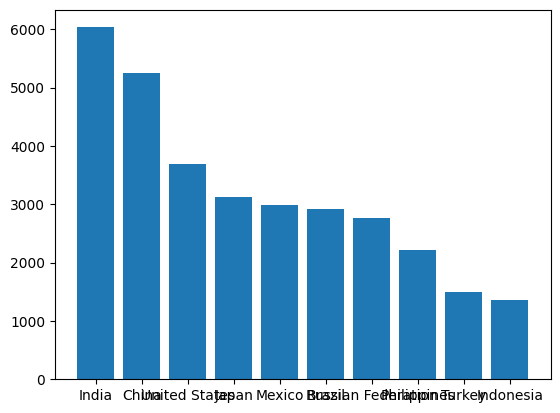

In [51]:
plt.bar(top_df3.country, top_df3.total_revenue)

In [38]:
# Question 4

query4 = """
    SELECT a.actor_id, a.first_name, a.last_name, SUM(p.amount) AS total_revenue
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    JOIN inventory inv ON fa.film_id = inv.film_id
    JOIN rental r ON inv.inventory_id = r.inventory_id
    JOIN payment p ON r.rental_id = p.rental_id
    GROUP BY a.actor_id, a.first_name, a.last_name
    ORDER BY total_revenue DESC
    """

actor_revenue_df = pd.read_sql_query(query4, conn)

C:\Users\ziadh\AppData\Local\Temp\ipykernel_300\1405661663.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  actor_revenue_df = pd.read_sql_query(query4, conn)


In [42]:
actor_revenue_df.head(11)

,actor_id,first_name,last_name,total_revenue
0,107,Gina,Degeneres,3129.17
1,181,Matthew,Carrey,2543.78
2,198,Mary,Keitel,2426.92
3,81,Scarlett,Damon,2403.81
4,102,Walter,Torn,2403.18
5,60,Henry,Berry,2392.36
6,58,Christian,Akroyd,2378.97
7,144,Angela,Witherspoon,2357.11
8,111,Cameron,Zellweger,2322.94
9,28,Woody,Hoffman,2315.92
